In [1]:
import pickle
from multiscale_new import *
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import warnings
warnings.filterwarnings("ignore")

## 1d Schwefel function

In [2]:
Data1 = pickle.load(open( "Data1.p", "rb" ))  ## 1d schwefel

In [3]:
data_dict = pickle.load( open( "data_dict.p", "rb" ) )

### Saving 100 samples of size 50 each

### Computing the mean and std for 100 repeated runs

In [4]:
maxs = 15
delta = 1.0e-3
pred_mul = np.zeros([200,100])
pred_gp0 = np.zeros([200,100])
pred_gp1 = np.zeros([200,100])
pred_gp2 = np.zeros([200,100])
for jj in sorted(data_dict):
    Data = data_dict[jj]
    
    ## multiscale
    eps = epsilon_0(Data,maxs,delta)
    sparse,Bs,Cs,f,T = Multiscale_train(Data,eps,maxs)
    pred_mul[:,jj] = predict(Data1[:,0:2],sparse,T,Cs)
    
    ## GP: alpha = 0.02
    kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel,alpha=0.02).fit(Data[:,0].reshape(-1,1), Data[:,2])
    pred_gp0[:,jj], y_cov = gp.predict(Data1[:,0].reshape(-1,1), return_cov=True)
    
    
     ## GP: alpha = 1.0e-4
    kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel,alpha=1.0e-4).fit(Data[:,0].reshape(-1,1), Data[:,2])
    pred_gp1[:,jj], y_cov = gp.predict(Data1[:,0].reshape(-1,1), return_cov=True)
    
    
     ## GP: alpha = 1.0e-8
    kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel,alpha=1.0e-8).fit(Data[:,0].reshape(-1,1), Data[:,2])
    pred_gp2[:,jj], y_cov = gp.predict(Data1[:,0].reshape(-1,1), return_cov=True)

### Plotting

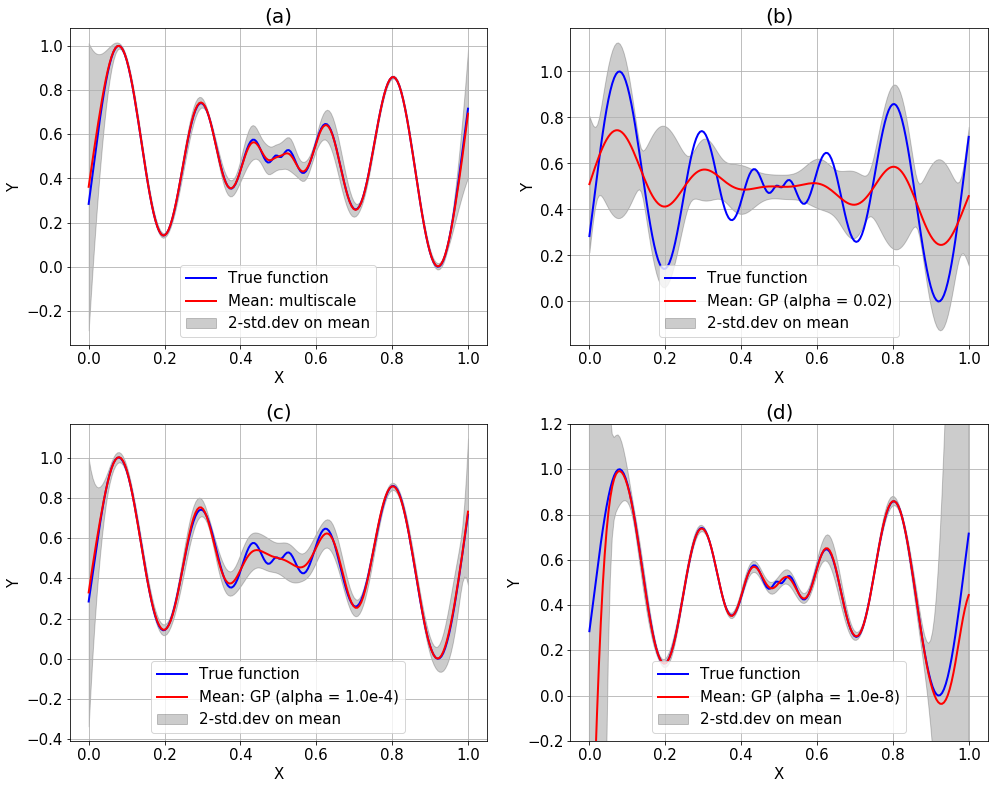

In [6]:
fig = figure(figsize=(15,10))

### Multiscale
ax = fig.add_subplot(2,2,1)
m_mean = np.mean(pred_mul,axis = 1)
m_std = np.std(pred_mul,axis = 1)
ax.plot(Data1[:,0],Data1[:,2],color ='b',lw = 2,label = 'True function')
ax.plot(Data1[:,0],m_mean,color = 'r',lw = 2,label = 'Mean: multiscale')
ax.fill_between(Data1[:,0].flatten(),m_mean.flatten()-2*m_std,m_mean.flatten()+2*m_std, alpha = 0.2,color = 'k',label = '2-std.dev on mean')
ax.set_xlabel('X',size = 15)
ax.set_ylabel('Y',size = 15)
xticks(size = 15)
yticks(size = 15)
ax.set_title('(a)',size = 20)
grid(True)
legend(loc = 8,prop = {'size':15})

### GP alpha = 0.02
ax = fig.add_subplot(2,2,2)
gp0_mean = np.mean(pred_gp0,axis = 1)
gp0_std = np.std(pred_gp0,axis = 1)
ax.plot(Data1[:,0],Data1[:,2],color ='b',lw = 2,label = 'True function')
ax.plot(Data1[:,0],gp0_mean,color ='r',lw = 2,label = 'Mean: GP (alpha = 0.02)')
ax.fill_between(Data1[:,0].flatten(),gp0_mean.flatten()-2*gp0_std,gp0_mean.flatten()+2*gp0_std, alpha = 0.2,color = 'k',label = '2-std.dev on mean')
ax.set_xlabel('X',size = 15)
ax.set_ylabel('Y',size = 15)
xticks(size = 15)
yticks(size = 15)
ax.set_title('(b)',size = 20)
grid(True)
legend(loc = 8,prop = {'size':15})

### GP alpha = 1.0e-4
ax = fig.add_subplot(2,2,3)
gp1_mean = np.mean(pred_gp1,axis = 1)
gp1_std = np.std(pred_gp1,axis = 1)
ax.plot(Data1[:,0],Data1[:,2],color ='b',lw = 2,label = 'True function')
ax.plot(Data1[:,0],gp1_mean,color ='r',lw = 2,label = 'Mean: GP (alpha = 1.0e-4)')
ax.fill_between(Data1[:,0].flatten(),gp1_mean.flatten()-2*gp1_std,gp1_mean.flatten()+2*gp1_std, alpha = 0.2,color = 'k',label = '2-std.dev on mean')
ax.set_xlabel('X',size = 15)
ax.set_ylabel('Y',size = 15)
xticks(size = 15)
yticks(size = 15)
ax.set_title('(c)',size = 20)
grid(True)
legend(loc = 8,prop = {'size':15})

### GP alpha = 1.0e-8
ax = fig.add_subplot(2,2,4)
gp2_mean = np.mean(pred_gp2,axis = 1)
gp2_std = np.std(pred_gp2,axis = 1)
ax.plot(Data1[:,0],Data1[:,2],color ='b',lw = 2,label = 'True function')
ax.plot(Data1[:,0],gp2_mean,color ='r',lw = 2,label = 'Mean: GP (alpha = 1.0e-8)')
ax.set_ylim([-0.2,1.2])
ax.fill_between(Data1[:,0].flatten(),gp2_mean.flatten()-2*gp2_std,gp2_mean.flatten()+2*gp2_std, alpha = 0.2,color = 'k',label = '2-std.dev on mean')
ax.set_xlabel('X',size = 15)
ax.set_ylabel('Y',size = 15)
ax.set_title('(d)',size = 20)
xticks(size = 15)
yticks(size = 15)
grid(True)
legend(loc = 8,prop = {'size':15})
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.2,hspace = 0.25) 
savefig('Pic7.pdf', bbox_inches='tight')
show()